This notebook explores each variable individually to understand user behavior, validate data quality, and establish the baseline conversion rate (29%). Engagement metrics such as visits, clicks, and time_spent are analyzed to identify distributions, ranges, and potential outliers before moving to conversion-focused analysis.

In [19]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [20]:
# # Loading the Dataset
df = pd.read_csv("C:/Users/Sandeep/Downloads/archive (1)/user_behavior_dataset.csv")
df.head()

,age,income,score,height,weight,visits,clicks,time_spent,target
0,39,59796,0.435,154.8,45.0,8,4,191,1
1,33,48031,0.709,164.3,63.9,5,4,366,0
2,41,45971,0.316,168.3,68.5,9,3,209,1
3,50,48756,0.508,189.0,94.7,9,5,314,0
4,32,35634,0.371,177.0,60.6,11,5,384,1


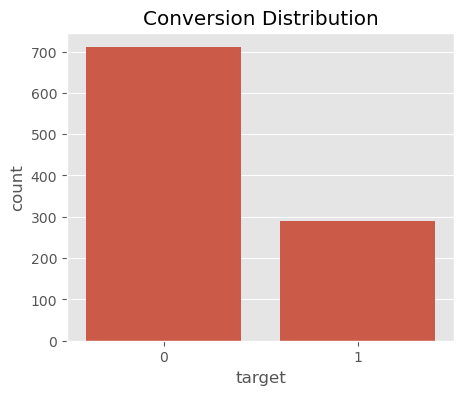

target
0    0.71
1    0.29
Name: proportion, dtype: float64

In [21]:
# Understanding Target's Convertion Distribution

plt.figure(figsize=(5,4))
sns.countplot(x="target", data=df)
plt.title("Conversion Distribution")
plt.show()

df["target"].value_counts(normalize=True)

## Target (Conversion) Distribution – Baseline KPI

The target variable represents trial-to-paid conversion (1 = converted, 0 = not converted).
The dataset shows an overall conversion rate of 29% and a non-conversion rate of 71%.
This value serves as the baseline KPI for the project, and all future analysis will evaluate which user behaviors and segments perform above or below this benchmark.

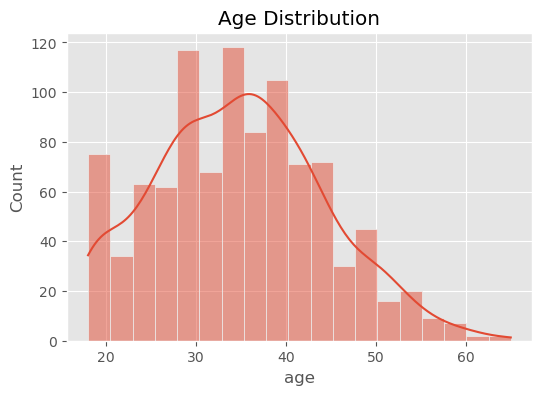

In [23]:
# Understanding Age Distribution

plt.figure(figsize=(6,4))
sns.histplot(df["age"], kde=True)
plt.title("Age Distribution")
plt.show()

## Age Distribution

User ages range from 18 to 65 years, with a median age of 35 years.
The distribution is balanced with no unrealistic or extreme values, indicating reliable demographic representation.
Age will later be analyzed against conversion to understand whether specific age groups show stronger purchase intent.

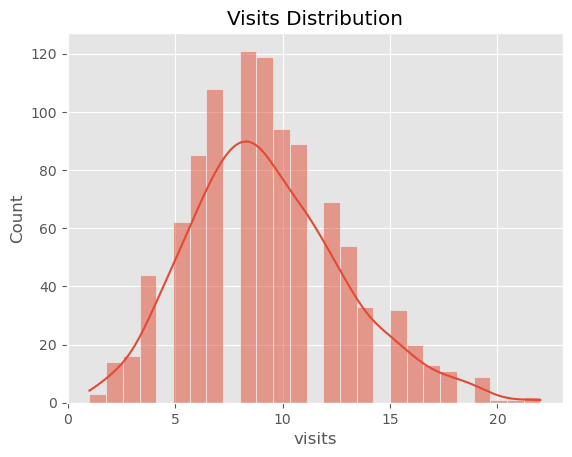

In [25]:
# Understanding the Engagement Metrics

#Visits
sns.histplot(df["visits"], kde=True)
plt.title("Visits Distribution")
plt.show()

## Visits Distribution

The median number of visits is 9, with most users falling between 7 and 11 visits (interquartile range).
The maximum observed value is 22 visits, indicating the presence of highly engaged users.
The right-skewed pattern suggests that increased visit frequency may be an important indicator of conversion likelihood.

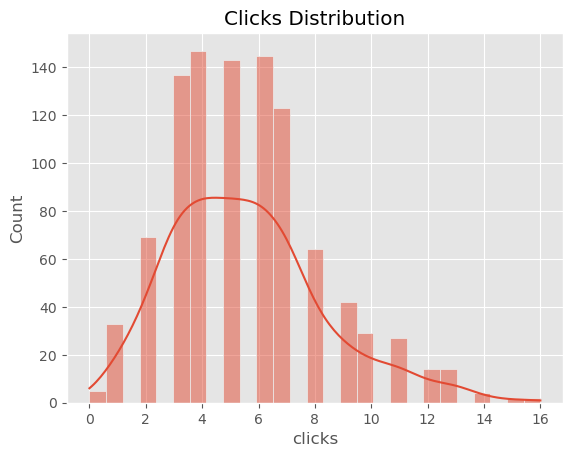

In [27]:
# Understanding the Engagement Metrics

#Clicks
sns.histplot(df["clicks"], kde=True)
plt.title("Clicks Distribution")
plt.show()


## Clicks Distribution

Clicks, representing in-app actions, have a median of 5 with a typical range of 4 to 7 clicks.
A small group of users record up to 16 clicks, reflecting power-user behavior.
This metric is expected to have a strong relationship with conversion and will be tested in the next stage.

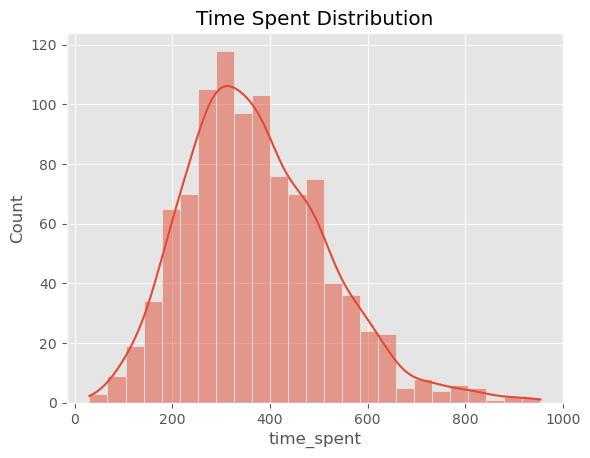

In [29]:
# Understanding the Engagement Metrics

#Time Spent
sns.histplot(df["time_spent"], kde=True)
plt.title("Time Spent Distribution")
plt.show()

## Time Spent Distribution

Users spend a median of 354 seconds on the platform, with most values between 271 and 463 seconds.
The maximum recorded time is 954 seconds, showing that a subset of users engage deeply with the product.
Longer session duration is likely to correlate positively with conversion.


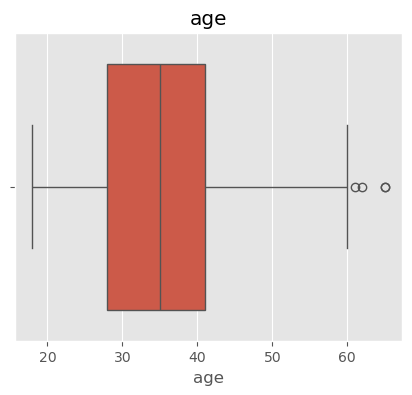

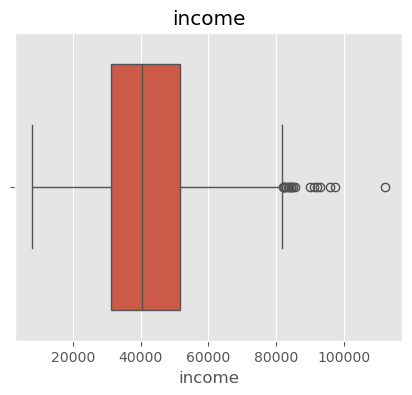

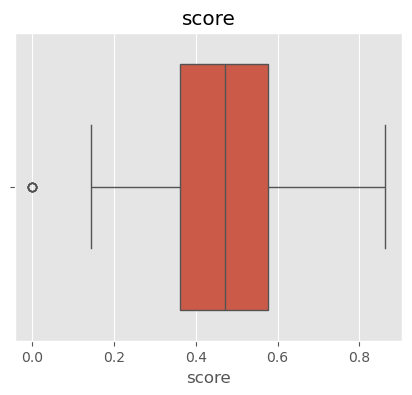

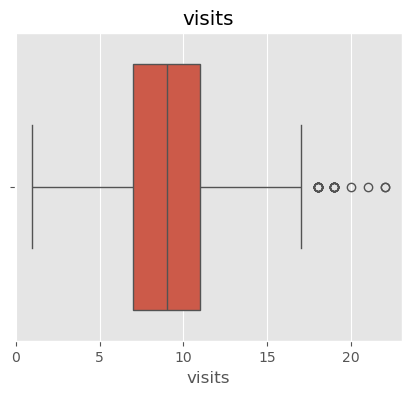

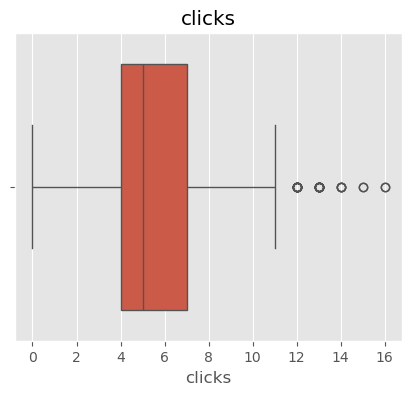

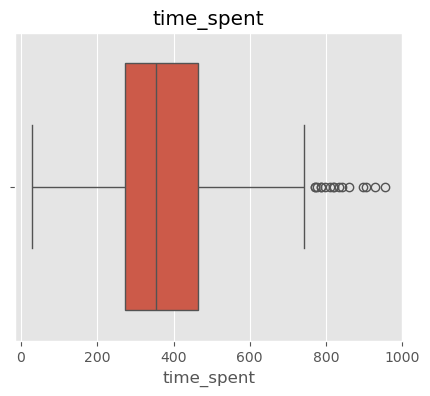

In [31]:
# Understanding Outliers through Boxplot

num_cols = ["age","income","score","visits","clicks","time_spent"]

for col in num_cols:
    plt.figure(figsize=(5,4))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

## Outlier Analysis Using Boxplots

Boxplots were used to examine the spread and detect extreme values across visits, clicks, and time_spent.
No critical outliers were observed, and all variables fall within realistic business ranges.
This confirms strong data quality and validates the dataset for further behavioral analysis.


In [33]:
# Summary Stats
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1000.0,34.812000,9.462991,18.0,28.000,35.0000,41.00000,65.000
income,1000.0,42433.235000,16343.081256,8000.0,31268.250,40328.5000,51475.75000,112113.000
score,1000.0,0.472451,0.148494,0.0,0.362,0.4715,0.57625,0.862
visits,1000.0,9.256000,3.595747,1.0,7.000,9.0000,11.00000,22.000
clicks,1000.0,5.561000,2.755335,0.0,4.000,5.0000,7.00000,16.000
time_spent,1000.0,371.404000,145.022123,30.0,271.750,354.0000,463.25000,954.000


## Univariate EDA Summary

Overall conversion rate: 29% (baseline KPI)
Engagement metrics show realistic and consistent ranges
Right-skewed behavior indicates presence of power users
No missing values, duplicates, or significant outliers detected
Dataset is ready for bivariate analysis to compare converted vs non-converted users
